In [6]:
import cv2
import os 
import json
import numpy as np
from scipy.io import loadmat
from tqdm import tqdm
import pickle 

import seaborn as sns
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, color, exposure, io
from skimage.io import imread 
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.base import clone

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


%matplotlib inline

In [ ]:
subject_ids = ['SN001', 'SN002', 'SN003', 'SN004', 'SN005', 'SN006', 'SN007', 'SN008', 'SN010', 'SN011', 'SN012', 'SN013', 'SN016', 'SN017', 'SN018', 'SN021', 'SN023', 'SN024', 'SN025', 'SN026', 'SN027', 'SN028', 'SN029', 'SN030', 'SN031', 'SN032']

### Calculating Histogram of Oriented Features (HOGs)

In [13]:
def extract_hog_features(image_path, target_size=(128, 64)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        # Resize image to the target size
        img_resized = resize(img, target_size, anti_aliasing=True)
        # Compute HOG features
        features, _ = hog(img_resized, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True, feature_vector=True)
        return features
    else:
        raise FileNotFoundError(f"The image at {image_path} could not be read.")

def process_subjects_for_hog(subject_ids, json_dir, cropped_dir):
    hog_features = {}
    
    for subject_id in tqdm(subject_ids, desc="Processing subjects"):
        subject_hog_features = []
        json_file_path = os.path.join(json_dir, f'{subject_id}.json')
        if os.path.exists(json_file_path):
            with open(json_file_path, 'r') as file:
                data = json.load(file)
                for frame_data in data:
                    img_path = os.path.join(cropped_dir, subject_id, f"{frame_data['id']}.jpg")
                    try:
                        features = extract_hog_features(img_path)
                        subject_hog_features.append(features)
                    except FileNotFoundError:
                        print(f"Warning: The file {img_path} does not exist.")
        
        hog_features[subject_id] = subject_hog_features

    return hog_features

json_dir = 'json'
cropped_images_dir = 'croppedImg'

# Process all subjects to compute HOG features
all_hog_features = process_subjects_for_hog(subject_ids, json_dir, cropped_images_dir)

# Save the HOG features to a .pkl file
with open('HOG_features.pkl', 'wb') as f:
    pickle.dump(all_hog_features, f)


Processing subjects: 100%|██████████| 26/26 [47:21<00:00, 109.31s/it]


### Visualzing the feature

Computing HOG for SN001: 100%|██████████| 4845/4845 [16:49<00:00,  4.80it/s]


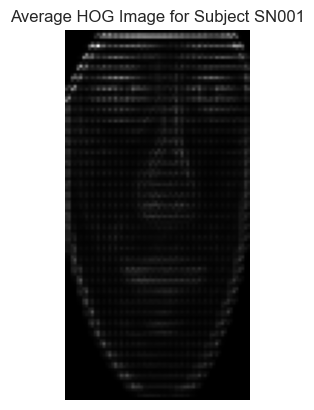

Computing HOG for SN002: 100%|██████████| 4845/4845 [14:46<00:00,  5.46it/s]


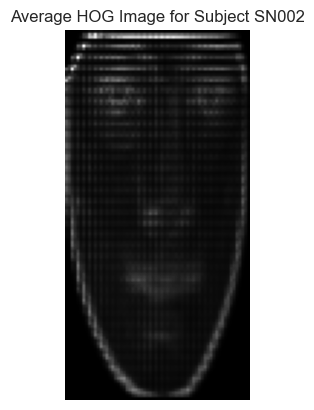

Computing HOG for SN003: 100%|██████████| 4845/4845 [12:00<00:00,  6.73it/s]


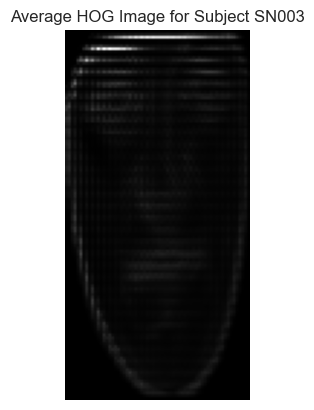

Computing HOG for SN004: 100%|██████████| 4845/4845 [10:41<00:00,  7.56it/s]


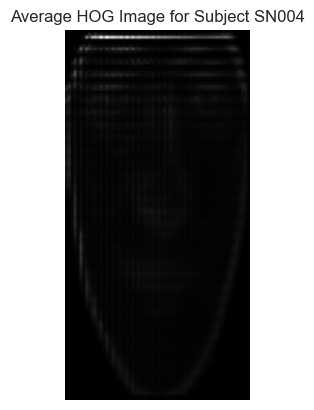

Computing HOG for SN005: 100%|██████████| 4845/4845 [16:07<00:00,  5.01it/s]


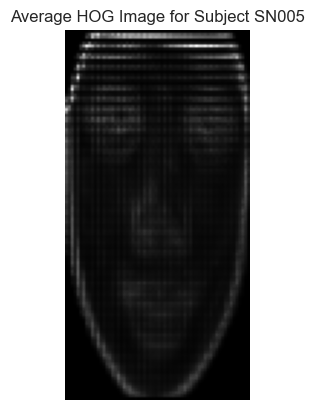

Computing HOG for SN006: 100%|██████████| 4845/4845 [15:52<00:00,  5.09it/s]


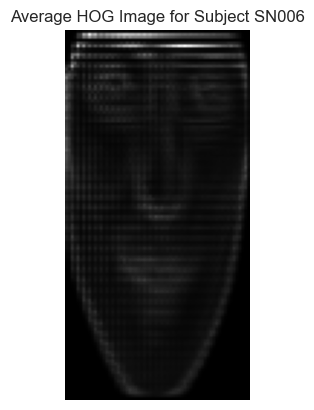

Computing HOG for SN007: 100%|██████████| 4845/4845 [16:35<00:00,  4.87it/s]


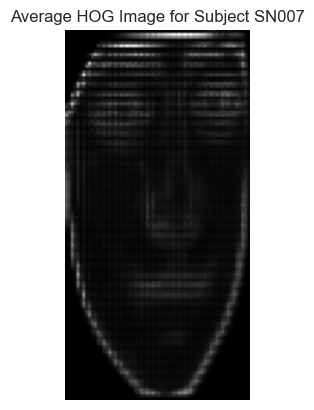

Computing HOG for SN008: 100%|██████████| 4845/4845 [19:05<00:00,  4.23it/s]


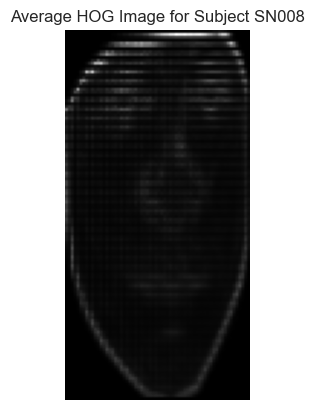

Computing HOG for SN008: 100%|██████████| 4845/4845 [19:03<00:00,  4.24it/s]


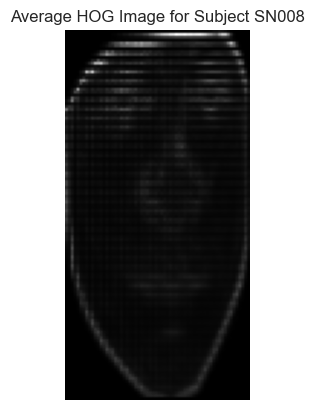

Computing HOG for SN010: 100%|██████████| 4844/4844 [15:22<00:00,  5.25it/s]


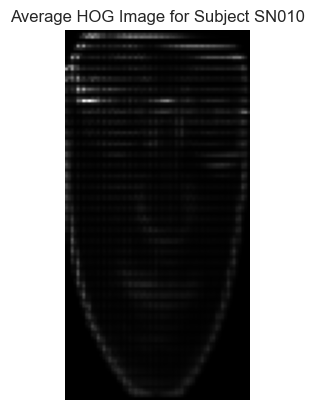

Computing HOG for SN011: 100%|██████████| 4845/4845 [11:22<00:00,  7.10it/s]


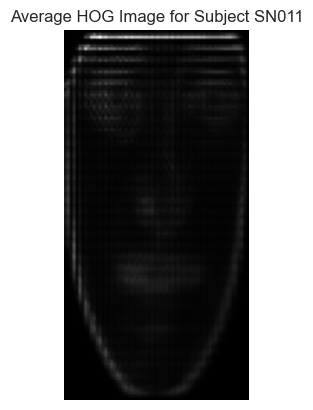

Computing HOG for SN012: 100%|██████████| 4845/4845 [15:52<00:00,  5.09it/s]


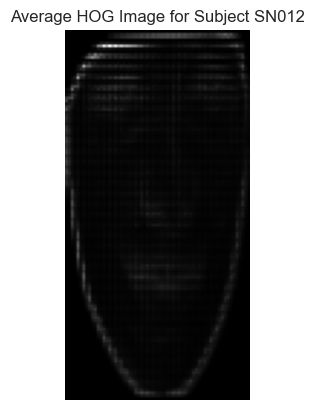

Computing HOG for SN013: 100%|██████████| 4845/4845 [16:31<00:00,  4.89it/s]


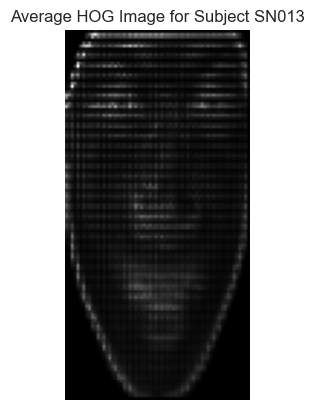

Computing HOG for SN016: 100%|██████████| 4845/4845 [15:24<00:00,  5.24it/s]


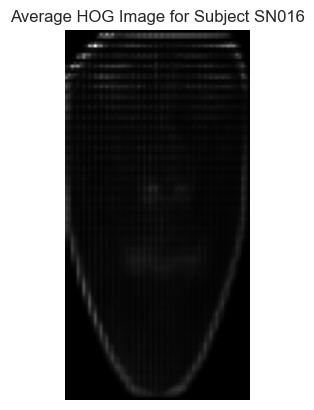

Computing HOG for SN017: 100%|██████████| 4845/4845 [11:19<00:00,  7.13it/s]


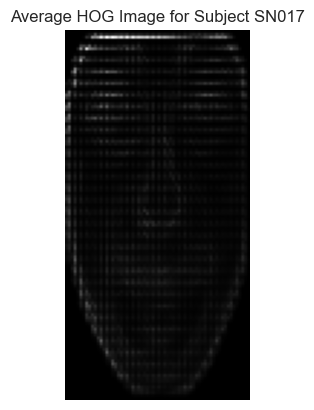

Computing HOG for SN018: 100%|██████████| 4845/4845 [10:03<00:00,  8.03it/s]


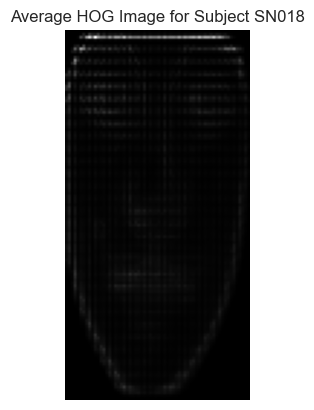

Computing HOG for SN021: 100%|██████████| 4845/4845 [15:15<00:00,  5.29it/s]


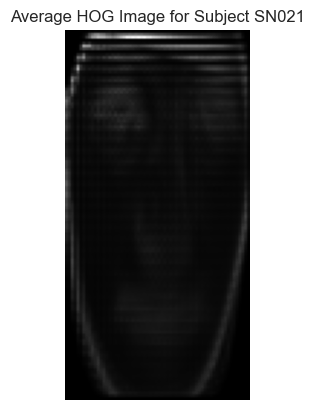

Computing HOG for SN023: 100%|██████████| 4845/4845 [17:31<00:00,  4.61it/s]


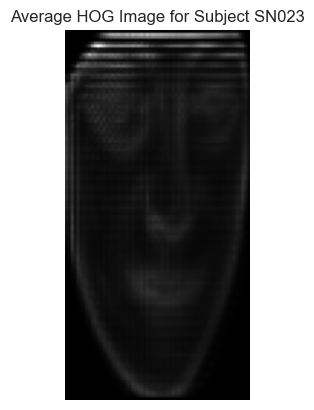

Computing HOG for SN024: 100%|██████████| 4845/4845 [13:58<00:00,  5.78it/s]


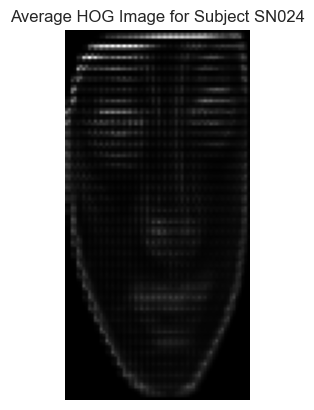

Computing HOG for SN025: 100%|██████████| 4845/4845 [19:11<00:00,  4.21it/s]


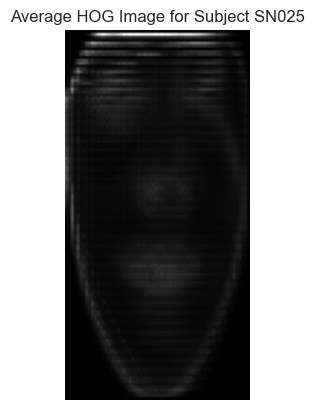

Computing HOG for SN026: 100%|██████████| 4845/4845 [14:12<00:00,  5.69it/s]


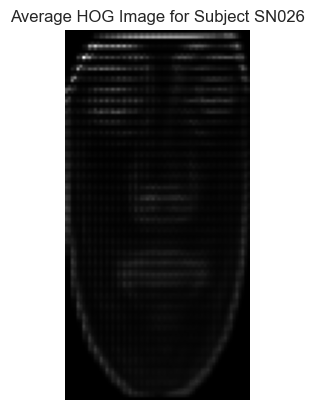

Computing HOG for SN027: 100%|██████████| 4845/4845 [12:59<00:00,  6.21it/s]


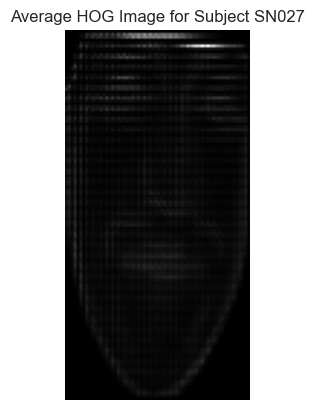

Computing HOG for SN028: 100%|██████████| 4845/4845 [15:20<00:00,  5.26it/s]


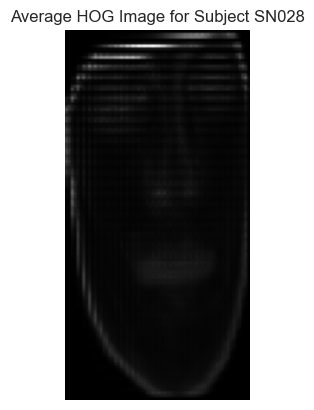

Computing HOG for SN029: 100%|██████████| 4845/4845 [18:03<00:00,  4.47it/s]


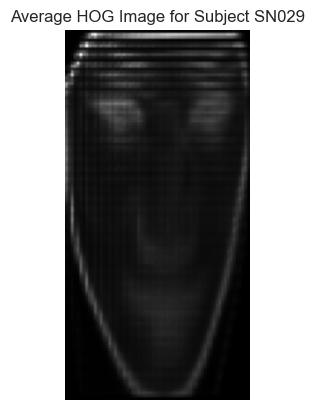

Computing HOG for SN030: 100%|██████████| 4845/4845 [15:30<00:00,  5.21it/s]


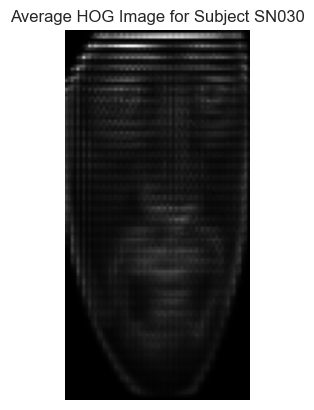

Computing HOG for SN031: 100%|██████████| 4845/4845 [14:24<00:00,  5.61it/s]


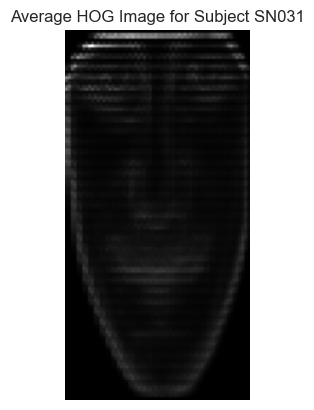

Computing HOG for SN032: 100%|██████████| 4845/4845 [14:06<00:00,  5.72it/s]


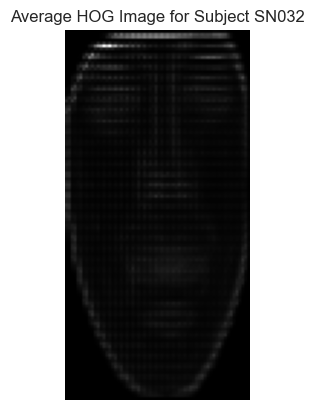

In [14]:
def compute_and_plot_average_hog(subject_id, target_size=(128, 64)):
    cropped_dir = os.path.join("croppedImg", subject_id)
    hog_images = []

    for img_name in tqdm(os.listdir(cropped_dir), desc=f"Computing HOG for {subject_id}"):
        img_path = os.path.join(cropped_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Compute HOG features and the associated visualization image
            _, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
            # Resize the HOG image to the target size
            resized_hog_image = resize(hog_image, target_size, anti_aliasing=True)
            hog_images.append(resized_hog_image)

    # Compute the average of the resized HOG images
    if hog_images:
        sns.set(style="whitegrid")
        average_hog_image = np.mean(hog_images, axis=0)
        plt.imshow(average_hog_image, cmap='gray')
        plt.title(f"Average HOG Image for Subject {subject_id}")
        plt.axis('off')
        plt.show()

for subject_id in subject_ids:
    compute_and_plot_average_hog(subject_id)


Computing HOG for SN001:   0%|          | 0/4845 [00:00<?, ?it/s]

Computing HOG for SN001: 100%|██████████| 4845/4845 [02:15<00:00, 35.86it/s]


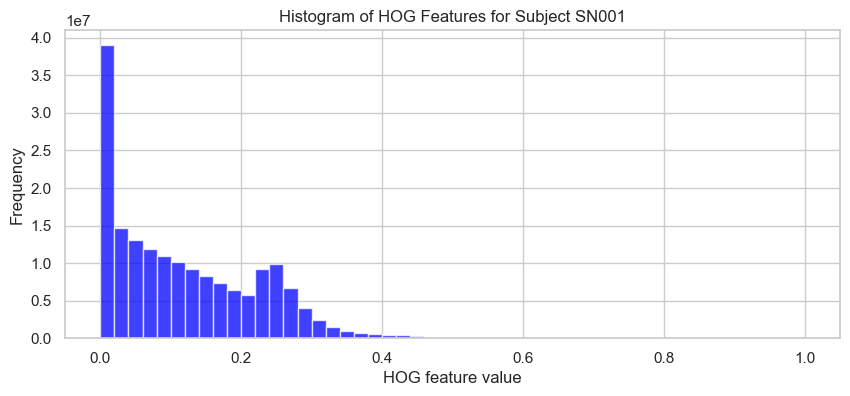

Computing HOG for SN002: 100%|██████████| 4845/4845 [02:24<00:00, 33.41it/s]


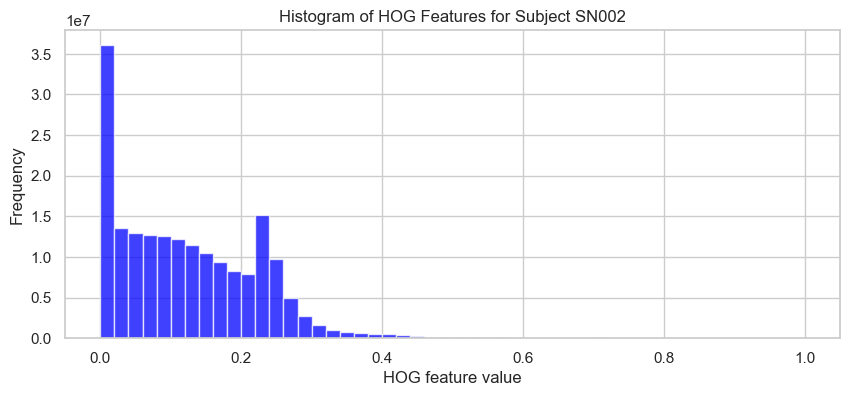

Computing HOG for SN003: 100%|██████████| 4845/4845 [01:56<00:00, 41.49it/s]


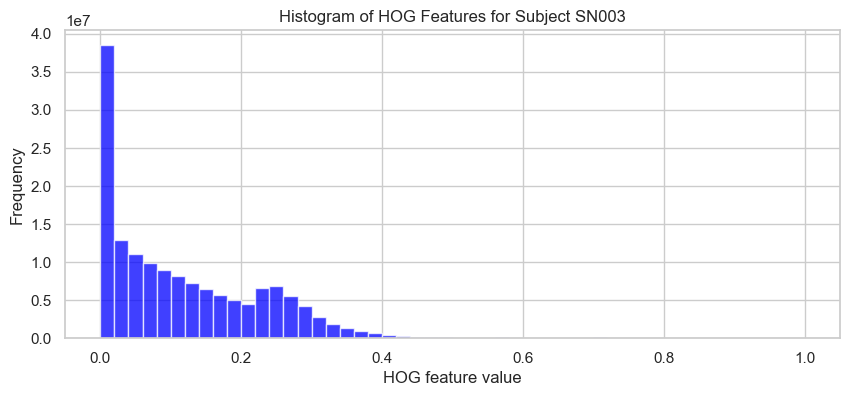

Computing HOG for SN004: 100%|██████████| 4845/4845 [01:43<00:00, 47.04it/s]


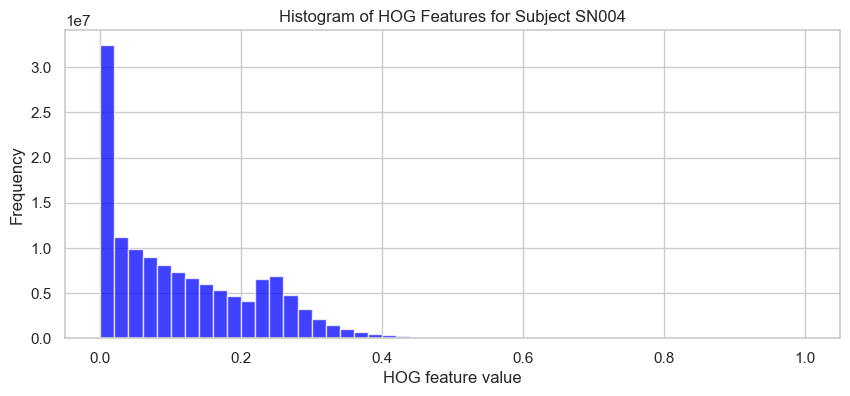

Computing HOG for SN005: 100%|██████████| 4845/4845 [02:35<00:00, 31.12it/s]


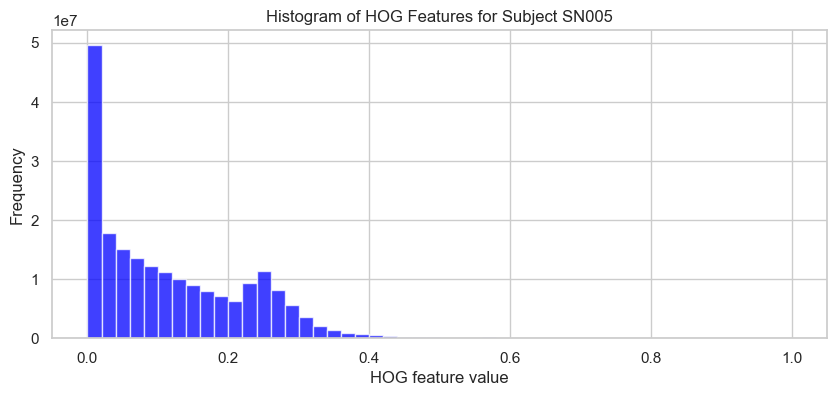

Computing HOG for SN006: 100%|██████████| 4845/4845 [02:33<00:00, 31.57it/s]


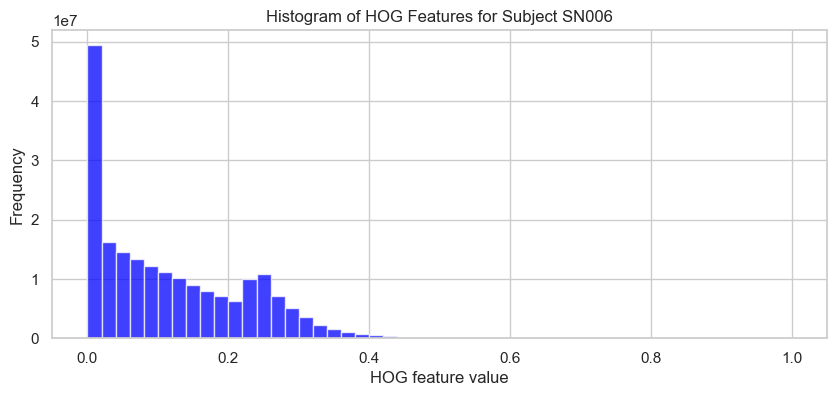

Computing HOG for SN007: 100%|██████████| 4845/4845 [02:39<00:00, 30.31it/s]


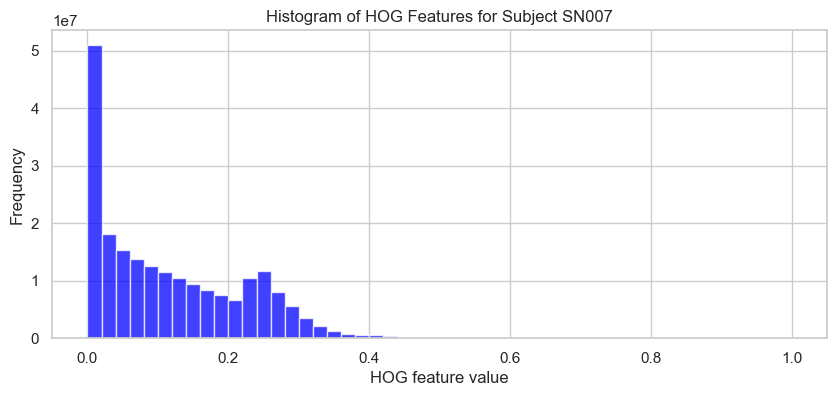

Computing HOG for SN008: 100%|██████████| 4845/4845 [03:04<00:00, 26.30it/s]


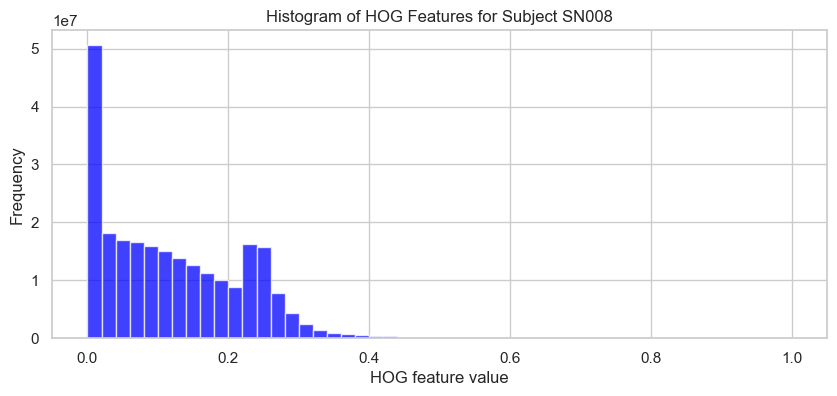

Computing HOG for SN010: 100%|██████████| 4844/4844 [02:28<00:00, 32.53it/s]


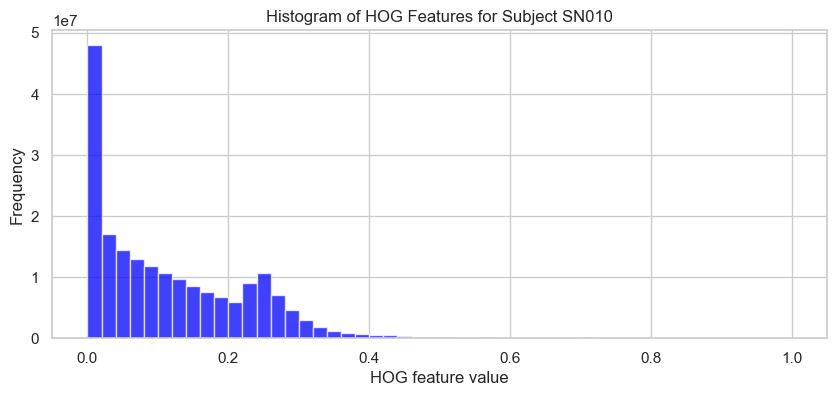

Computing HOG for SN011: 100%|██████████| 4845/4845 [01:49<00:00, 44.24it/s]


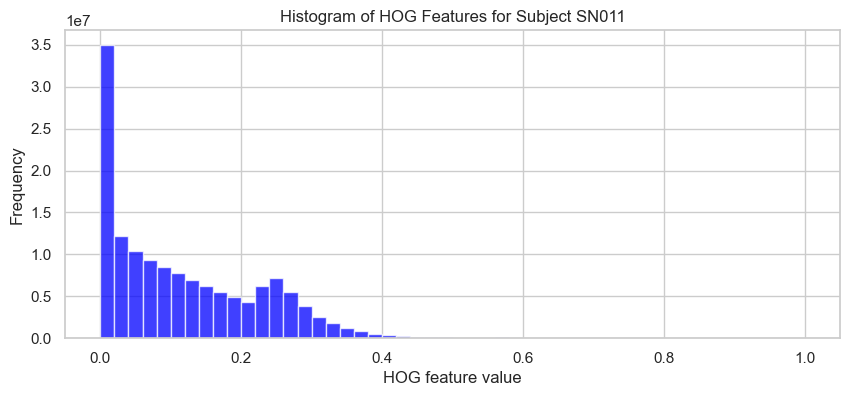

Computing HOG for SN012: 100%|██████████| 4845/4845 [02:33<00:00, 31.51it/s]


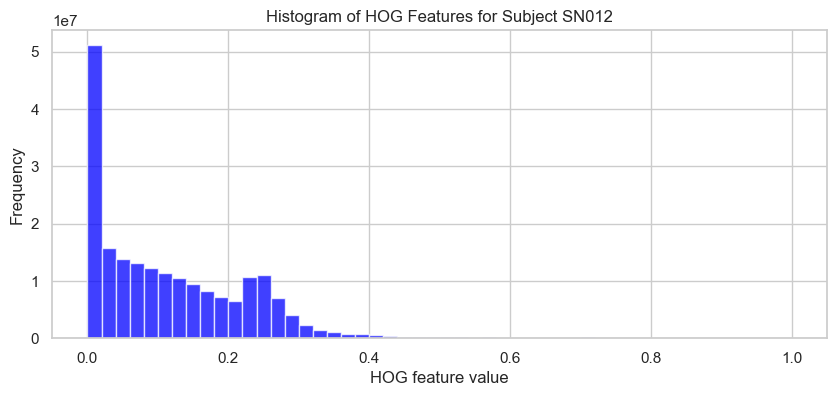

Computing HOG for SN013: 100%|██████████| 4845/4845 [02:41<00:00, 29.97it/s]


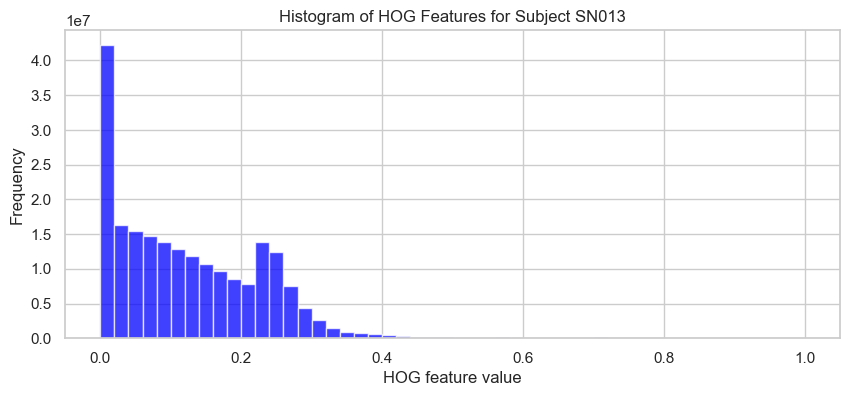

Computing HOG for SN016: 100%|██████████| 4845/4845 [02:31<00:00, 32.06it/s]


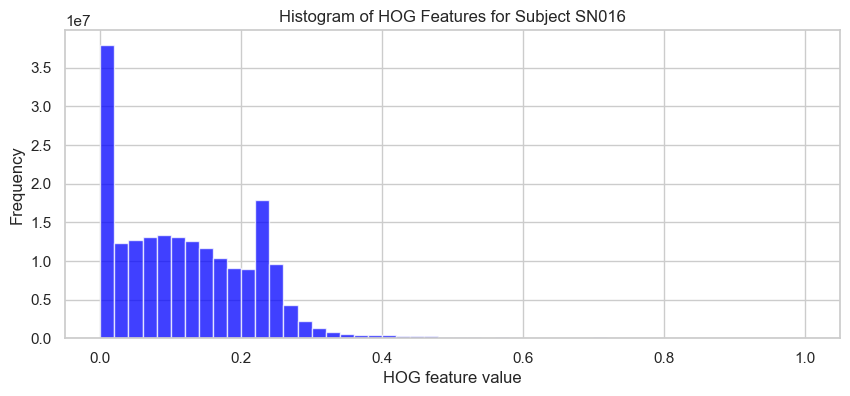

Computing HOG for SN017: 100%|██████████| 4845/4845 [01:49<00:00, 44.36it/s]


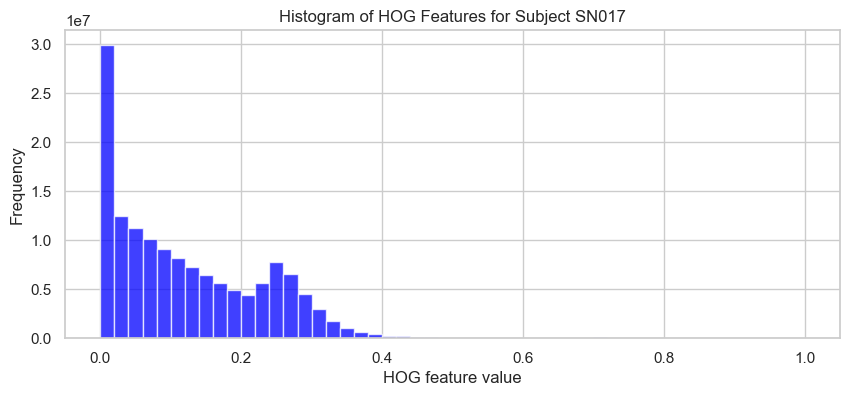

Computing HOG for SN018: 100%|██████████| 4845/4845 [01:37<00:00, 49.76it/s]


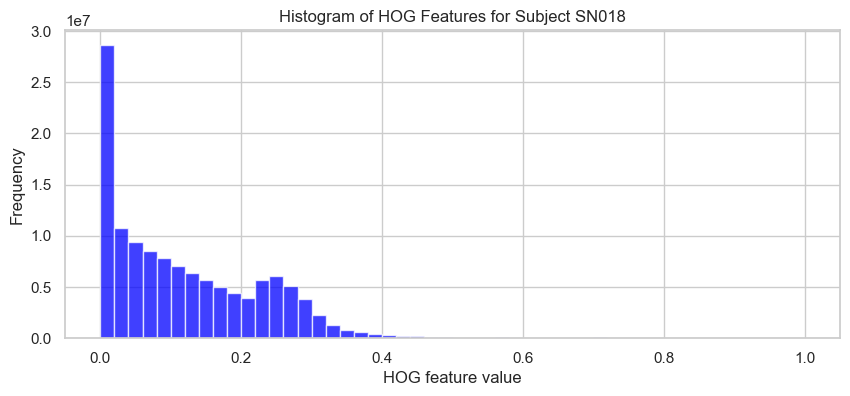

Computing HOG for SN021: 100%|██████████| 4845/4845 [02:25<00:00, 33.19it/s]


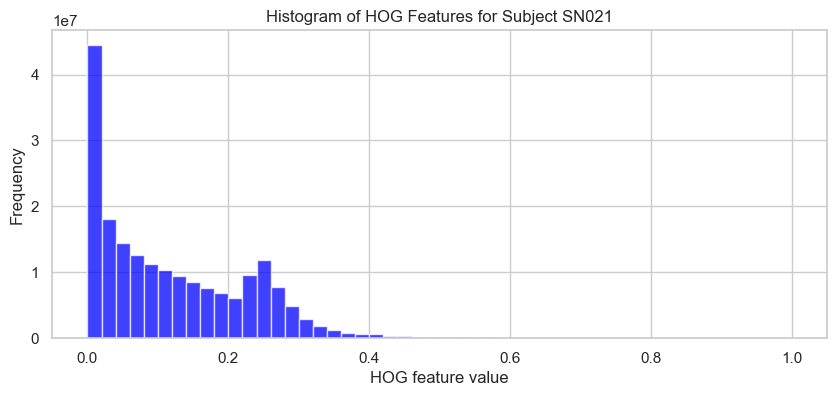

Computing HOG for SN023: 100%|██████████| 4845/4845 [02:47<00:00, 28.93it/s]


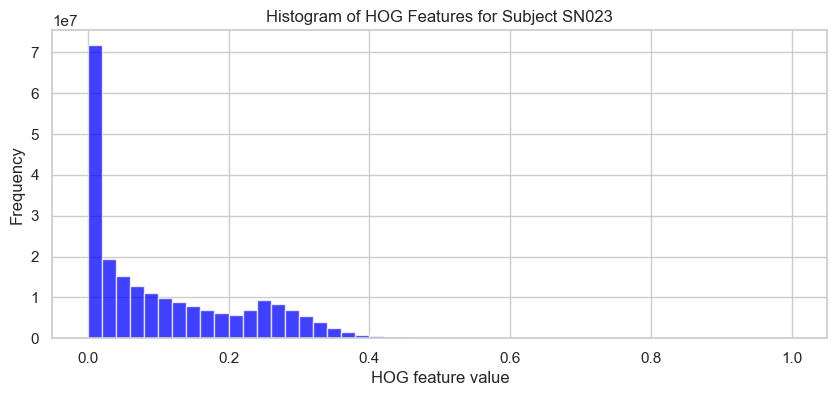

Computing HOG for SN024: 100%|██████████| 4845/4845 [02:14<00:00, 35.91it/s]


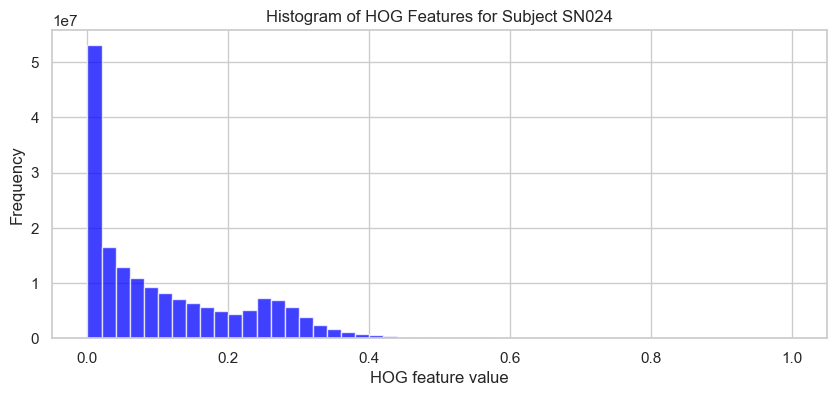

Computing HOG for SN025: 100%|██████████| 4845/4845 [03:03<00:00, 26.35it/s]


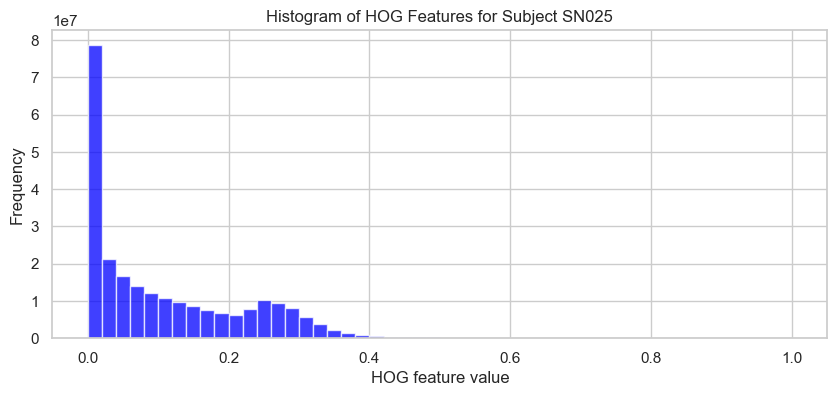

Computing HOG for SN026: 100%|██████████| 4845/4845 [02:16<00:00, 35.53it/s]


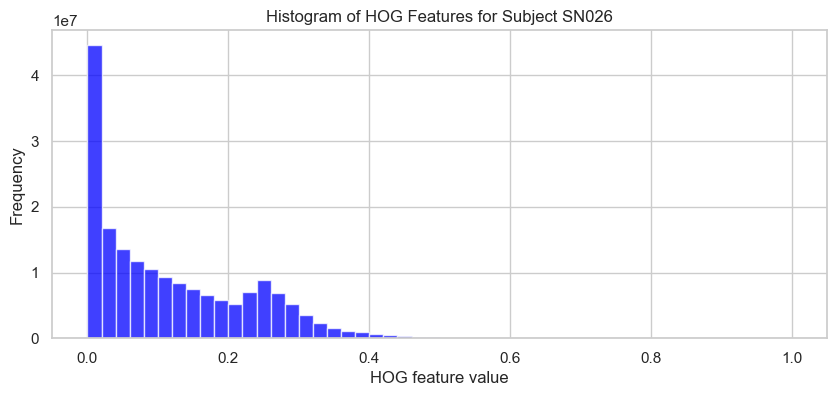

Computing HOG for SN027: 100%|██████████| 4845/4845 [02:03<00:00, 39.30it/s]


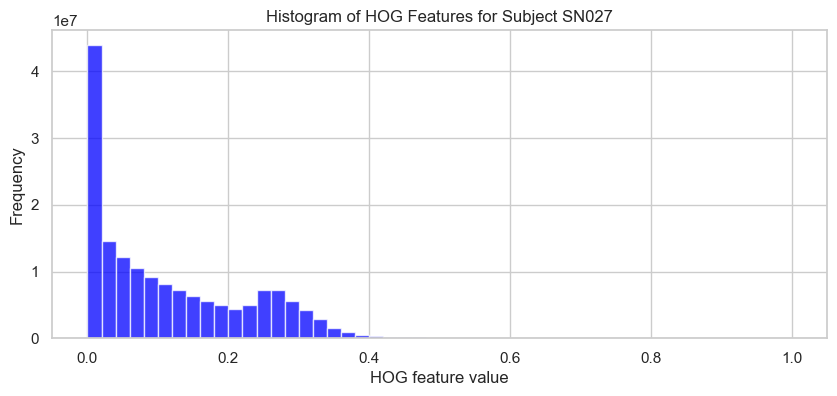

Computing HOG for SN028: 100%|██████████| 4845/4845 [02:27<00:00, 32.95it/s]


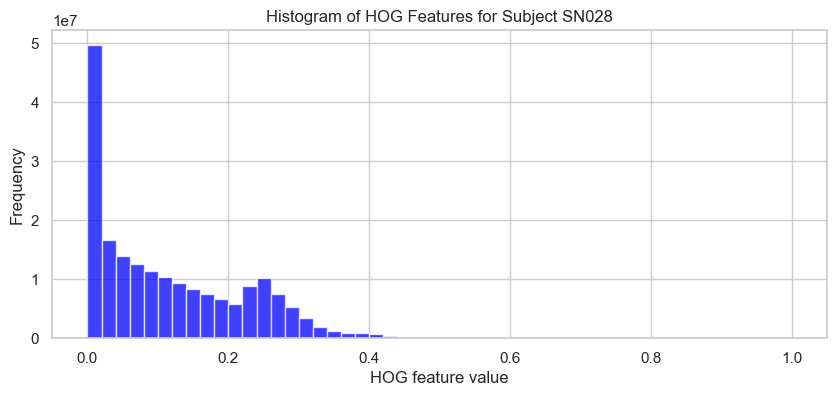

Computing HOG for SN029: 100%|██████████| 4845/4845 [02:51<00:00, 28.29it/s]


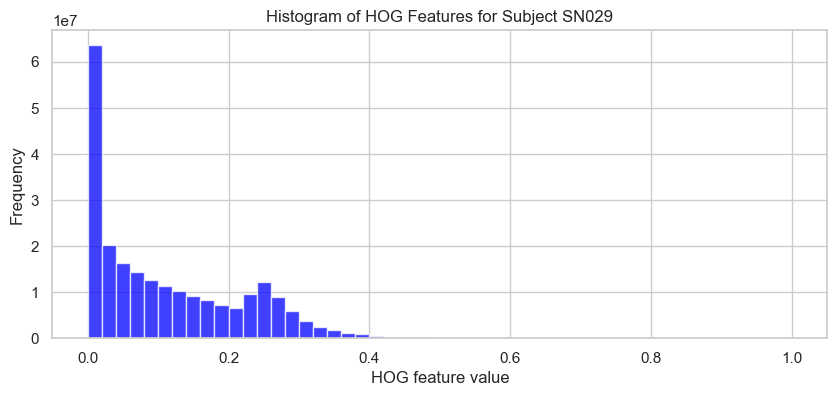

Computing HOG for SN030: 100%|██████████| 4845/4845 [02:27<00:00, 32.85it/s]


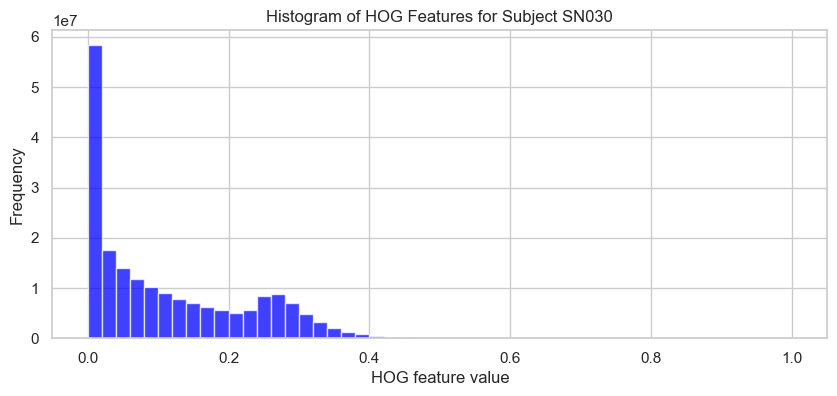

Computing HOG for SN031: 100%|██████████| 4845/4845 [02:16<00:00, 35.38it/s]


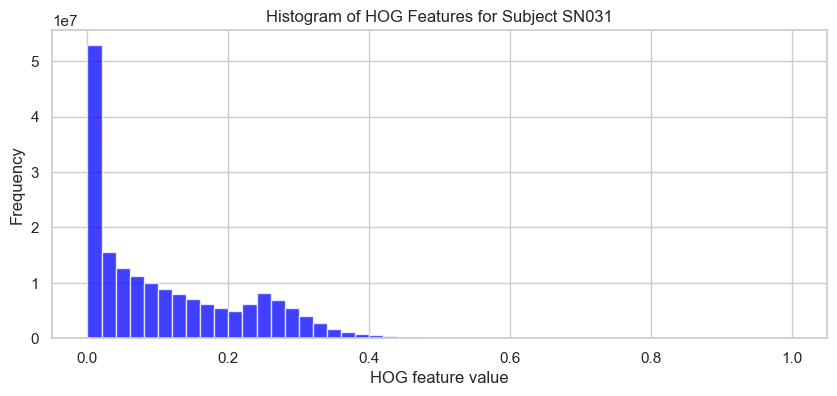

Computing HOG for SN032: 100%|██████████| 4845/4845 [02:15<00:00, 35.77it/s]


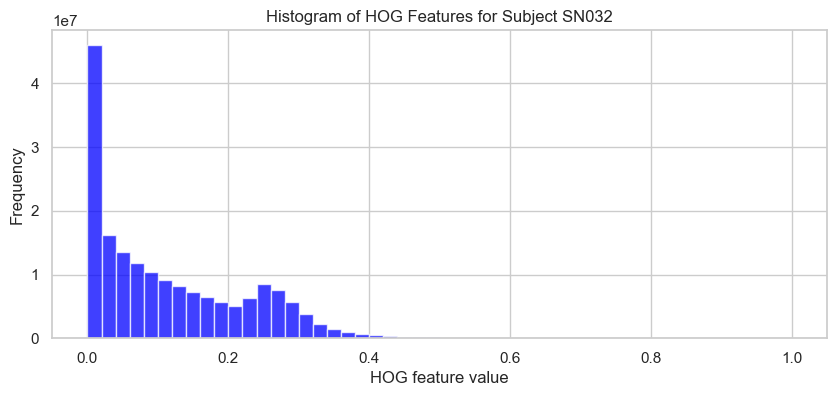

In [15]:
def compute_hog_features_and_create_histogram(subject_id, target_size=(128, 64)):
    cropped_dir = os.path.join("croppedImg", subject_id)
    hog_features_list = []

    for img_name in tqdm(os.listdir(cropped_dir), desc=f"Computing HOG for {subject_id}"):
        img_path = os.path.join(cropped_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), block_norm='L2-Hys')
            hog_features_list.append(hog_features)

    # Concatenate all HOG features from all images to create a single feature vector
    all_hog_features = np.concatenate(hog_features_list)

    # Now create the histogram
    plt.figure(figsize=(10, 4))
    n_bins = 50  
    plt.hist(all_hog_features, bins=n_bins, facecolor='blue', alpha=0.75)
    plt.title(f"Histogram of HOG Features for Subject {subject_id}")
    plt.xlabel('HOG feature value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

for subject_id in subject_ids:
    compute_hog_features_and_create_histogram(subject_id)


Calculating histograms for SN001:   0%|          | 0/4845 [00:00<?, ?it/s]

Calculating histograms for SN001: 100%|██████████| 4845/4845 [00:23<00:00, 204.10it/s]


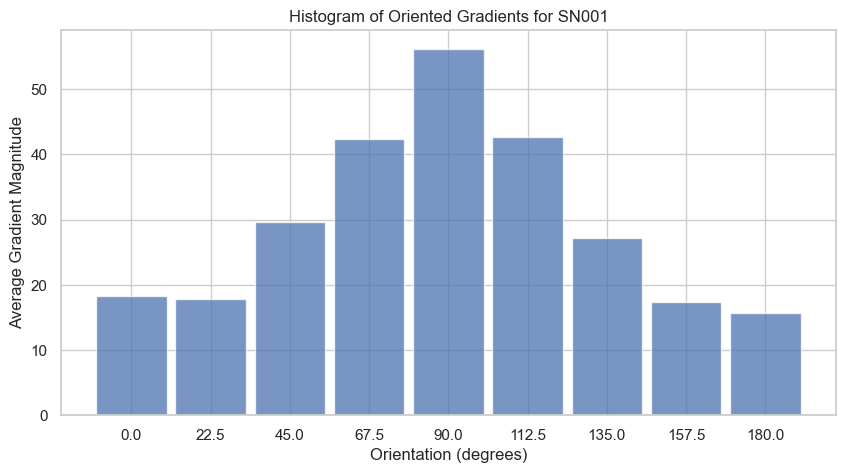

Calculating histograms for SN002: 100%|██████████| 4845/4845 [00:23<00:00, 202.02it/s]


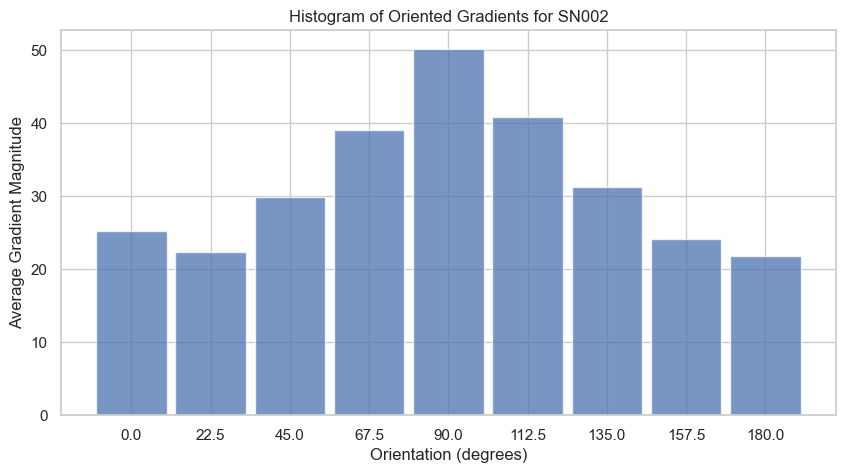

Calculating histograms for SN003: 100%|██████████| 4845/4845 [00:22<00:00, 211.19it/s]


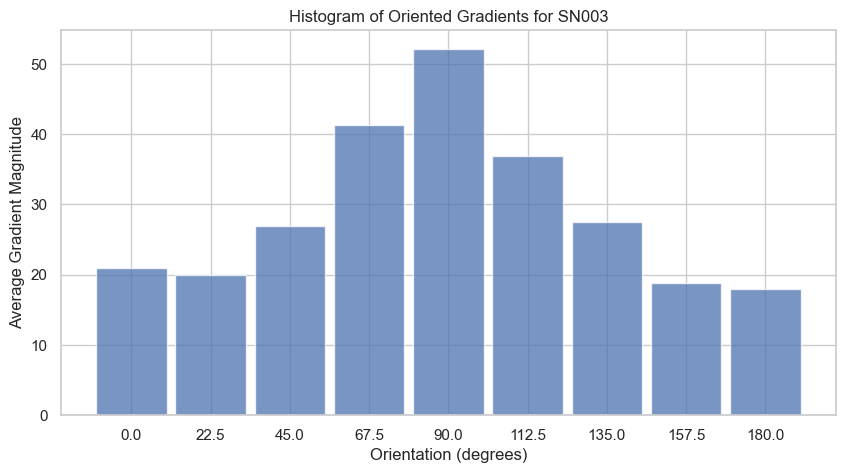

In [16]:
def calculate_gradient_histograms(img, cell_size=(8, 8), n_bins=9, pixels_per_cell=(8, 8)):
    # Compute HOG features without visualization, which is faster
    hog_features = hog(img, orientations=n_bins, pixels_per_cell=pixels_per_cell,
                       cells_per_block=(1, 1), block_norm='L2-Hys', feature_vector=False)
    # The hog_features here is a 3D array: (n_cells_row, n_cells_col, n_bins)
    # Sum histograms over all cells
    histogram = hog_features.sum(axis=(0, 1))
    return histogram

def calculate_histograms_for_subject(subject_id, image_size=(64, 128), cell_size=(8, 8), n_bins=9):
    cropped_dir = os.path.join("croppedImg", subject_id)
    histograms = []

    for img_name in tqdm(os.listdir(cropped_dir), desc=f"Calculating histograms for {subject_id}"):
        img_path = os.path.join(cropped_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            # Resize the image
            img_resized = resize(img, image_size, anti_aliasing=True)
            # Calculate HOG features
            histogram = calculate_gradient_histograms(img_resized, cell_size, n_bins)
            histograms.append(histogram)

    # Normalize the histograms by the number of images
    normalized_histogram = np.sum(histograms, axis=0) / len(histograms)
    return normalized_histogram

def plot_histograms(histogram, subject_id, n_bins=9):
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.title(f'Histogram of Oriented Gradients for {subject_id}')
    bin_centers = np.linspace(0, 180, n_bins)  

    histogram = histogram.ravel()
    
    # Create the bar graph with the histogram values
    plt.bar(bin_centers, histogram[:n_bins], width=180/n_bins, align='center', alpha=0.75)

    plt.xlabel('Orientation (degrees)')
    plt.ylabel('Average Gradient Magnitude')
    plt.xticks(bin_centers)
    plt.grid(True)
    plt.show()

for subject_id in subject_ids:
    normalized_histogram = calculate_histograms_for_subject(subject_id)
    plot_histograms(normalized_histogram, subject_id)


Calculating histograms for SN032: 100%|██████████| 4845/4845 [00:23<00:00, 202.12it/s]


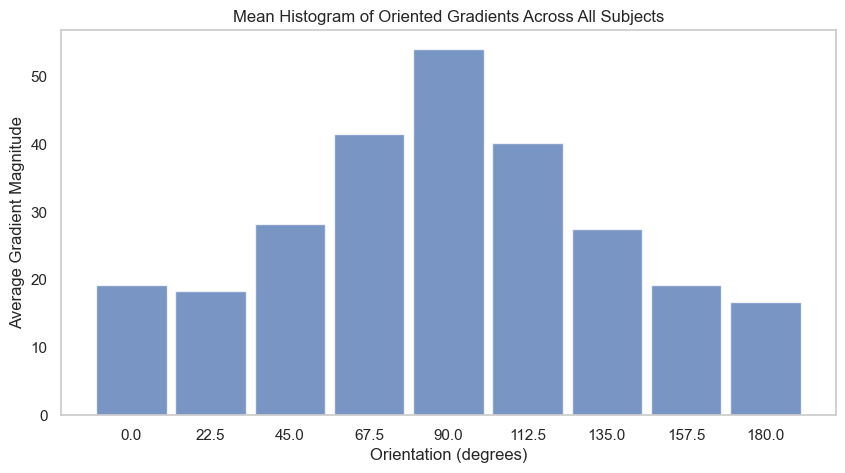

In [17]:
def compute_mean_histogram(subjectIds, image_size=(64, 128), cell_size=(8, 8), n_bins=9):
    all_histograms = []

    for subject_id in subjectIds:
        subject_histogram = calculate_histograms_for_subject(subject_id, image_size, cell_size, n_bins)
        all_histograms.append(subject_histogram)

    # Compute the mean histogram across all subjects
    mean_histogram = np.mean(all_histograms, axis=0)
    return mean_histogram

def plot_mean_histogram(mean_histogram, n_bins=9):
    plt.figure(figsize=(10, 5))
    plt.title('Mean Histogram of Oriented Gradients Across All Subjects')
    bin_centers = np.linspace(0, 180, n_bins)

    # Make sure the histogram array is 1D
    mean_histogram = mean_histogram.ravel()

    plt.bar(bin_centers, mean_histogram[:n_bins], width=180/n_bins, align='center', alpha=0.75)
    plt.xlabel('Orientation (degrees)')
    plt.ylabel('Average Gradient Magnitude')
    plt.xticks(bin_centers)
    plt.grid(False)
    plt.show()

    sns.set(style="whitegrid")

mean_histogram = compute_mean_histogram(subject_ids)
plot_mean_histogram(mean_histogram)


In [ ]:
combined_features = []
labels = []

with open('HOG.pkl', 'wb') as f:
    pickle.dump(combined_features, f)
with open('labels.pkl', 'wb') as f:
    pickle.dump(labels, f)

### Machine Learning Aspect

Comparing various ML Classifiers to find the best classifier on the dataset. 

In [ ]:
X = np.array(combined_features)
y = np.array(labels)

# Remove AUs with only one class
var_threshold = 0.0  # Threshold for variance
filtered_indices = [i for i in range(y.shape[1]) if np.var(y[:, i]) > var_threshold]
y_filtered = y[:, filtered_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models to compare
models = {
    'SVM': MultiOutputClassifier(SVC(kernel='linear', decision_function_shape='ovo')),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier()),
    'Decision Tree': MultiOutputClassifier(DecisionTreeClassifier()),
    'Naive Bayes': MultiOutputClassifier(GaussianNB()),
    'KNN': MultiOutputClassifier(KNeighborsClassifier())
}

# Initialize a dictionary to store the metrics for each model
model_metrics = {model_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for model_name in models.keys()}

# Train each model and calculate metrics
for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics for each label and take the average
    accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
    precisions = [precision_score(y_test[:, i], y_pred[:, i], average='macro', zero_division=0) for i in range(y_test.shape[1])]
    recalls = [recall_score(y_test[:, i], y_pred[:, i], average='macro', zero_division=0) for i in range(y_test.shape[1])]
    f1s = [f1_score(y_test[:, i], y_pred[:, i], average='macro', zero_division=0) for i in range(y_test.shape[1])]

    model_metrics[model_name]['accuracy'].append(np.mean(accuracies))
    model_metrics[model_name]['precision'].append(np.mean(precisions))
    model_metrics[model_name]['recall'].append(np.mean(recalls))
    model_metrics[model_name]['f1'].append(np.mean(f1s))

# Plotting the metrics
plt.figure(figsize=(15, 8))
barWidth = 0.15
positions = np.arange(len(models))

for idx, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
    means = [model_metrics[model_name][metric][0] for model_name in models.keys()]
    plt.bar(positions + idx * barWidth, means, width=barWidth, label=metric.capitalize())

sns.set(style="whitegrid")
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks(positions + 1.5 * barWidth, models.keys())
plt.legend()
plt.title('Comparison of Model Metrics')
plt.show()


Training SVM...


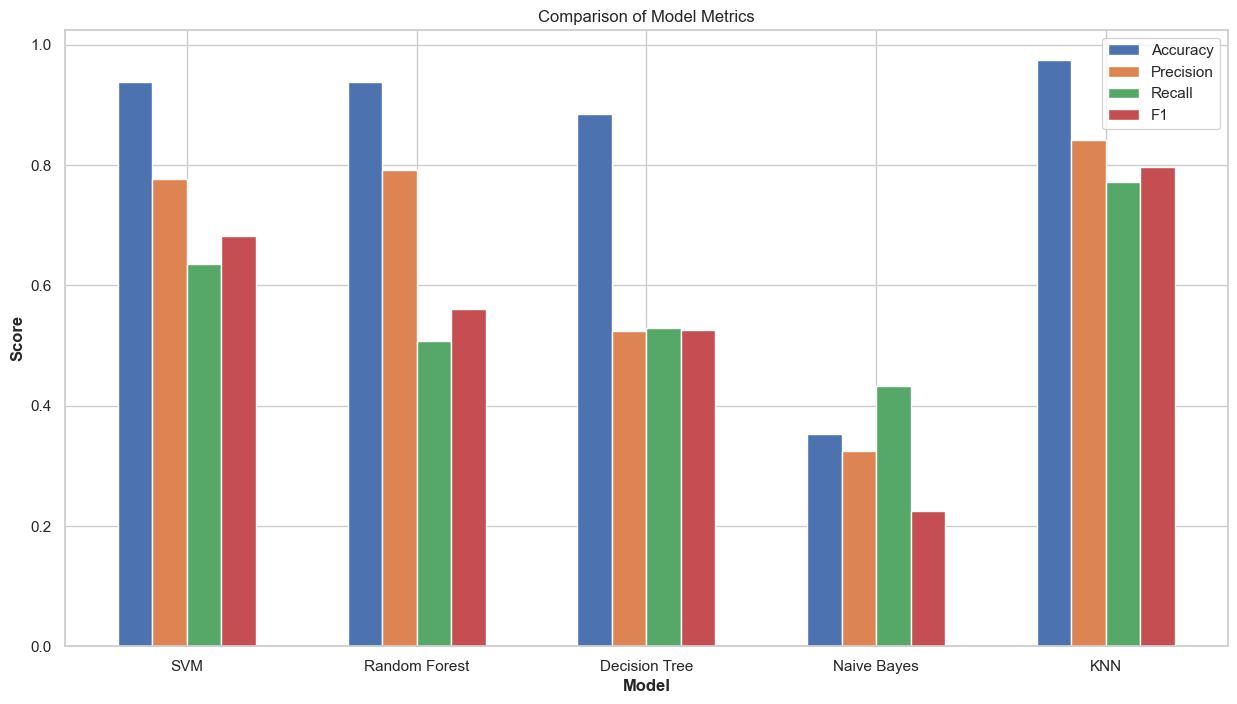

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the metrics
plt.figure(figsize=(15, 8))
barWidth = 0.15
positions = np.arange(len(models))

for idx, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
    means = [model_metrics[model_name][metric][0] for model_name in models.keys()]
    plt.bar(positions + idx * barWidth, means, width=barWidth, label=metric.capitalize())

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks(positions + 1.5 * barWidth, models.keys())
plt.legend()
plt.title('Comparison of Model Metrics')
plt.show()


### Running Random Forest Classifier 

In [8]:
# Train a multi-output Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=20)  
multi_target_rf = MultiOutputClassifier(random_forest, n_jobs=-1)
multi_target_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_target_rf.predict(X_test)

# Calculate accuracy for each AU
accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
average_accuracy = np.mean(accuracies)
print(f'Average Accuracy: {average_accuracy}')
for i, acc in enumerate(accuracies):
    print(f'Accuracy for AU{filtered_indices[i]+1}: {acc}')


Average Accuracy: 0.9322445201452676
Accuracy for AU1: 0.8813007384304912
Accuracy for AU2: 0.9739026739439527
Accuracy for AU4: 0.8723570150896666
Accuracy for AU5: 0.9932119433105536
Accuracy for AU6: 0.9223501353024813
Accuracy for AU9: 0.9342292345090125
Accuracy for AU12: 0.9234967665000229
Accuracy for AU17: 0.9944503050038985
Accuracy for AU20: 0.9949089574829152
Accuracy for AU25: 0.8633674265009402
Accuracy for AU26: 0.9011145255240105


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision for each AU
precision = [precision_score(y_test[:, i], y_pred[:, i], average='macro') for i in range(y_test.shape[1])]
recall = [recall_score(y_test[:, i], y_pred[:, i], average='macro') for i in range(y_test.shape[1])]
f1 = [f1_score(y_test[:, i], y_pred[:, i], average='macro') for i in range(y_test.shape[1])]

average_recall = np.mean(recall)
print(f'Average Recall: {average_recall}')
for i, rec in enumerate(recall):
    print(f'Recall for AU{filtered_indices[i]+1}: {rec}')

average_f1 = np.mean(f1)
print(f'Average F1: {average_f1}')
for i, f1 in enumerate(f1):
    print(f'F1 for AU{filtered_indices[i]+1}: {f1}')

average_precision = np.mean(precision)
print(f'Average Precision: {average_precision}')
for i, prec in enumerate(precision):
    print(f'Precision for AU{filtered_indices[i]+1}: {prec}')

Average Recall: 0.4981076177032133
Recall for AU1: 0.4505783722425043
Recall for AU2: 0.32246875129449015
Recall for AU4: 0.4732670247470409
Recall for AU5: 0.37806065621842455
Recall for AU6: 0.5163770056039456
Recall for AU9: 0.5041949845943307
Recall for AU12: 0.6183569665706727
Recall for AU17: 0.366120218579235
Recall for AU20: 0.3333333333333333
Recall for AU25: 0.6217408684709421
Recall for AU26: 0.8946856130804285
Average F1: 0.552270530489258
F1 for AU1: 0.5319042177636241
F1 for AU2: 0.3764087330647401
F1 for AU4: 0.5587925909302742
F1 for AU5: 0.41017745270142164
F1 for AU6: 0.6190476970991656
F1 for AU9: 0.6048738876511303
F1 for AU12: 0.6966942854267592
F1 for AU17: 0.39210679077404675
F1 for AU20: 0.3324903051761929
F1 for AU25: 0.654944447351674
F1 for AU26: 0.897535427442809
Average Precision: 0.7714358632273356
Precision for AU1: 0.8568791911835661
Precision for AU2: 0.7336521322958514
Precision for AU4: 0.8343142454531788
Precision for AU5: 0.6341292730806527
Precisio

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Running a K-NN Classifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define and train the KNN classifier within a multi-output framework
knn = KNeighborsClassifier(n_neighbors=5)  
multi_target_knn = MultiOutputClassifier(knn, n_jobs=-1)
multi_target_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = multi_target_knn.predict(X_test)

# Calculate accuracy for each AU
accuracies_knn = [accuracy_score(y_test[:, i], y_pred_knn[:, i]) for i in range(y_test.shape[1])]
average_accuracy_knn = np.mean(accuracies_knn)
print(f'Average Accuracy with KNN: {average_accuracy_knn}')
for i, acc in enumerate(accuracies_knn):
    print(f'Accuracy for AU{filtered_indices[i]+1} with KNN: {acc}')


Average Accuracy with KNN: 0.9749700833496643
Accuracy for AU1 with KNN: 0.9521166811906618
Accuracy for AU2 with KNN: 0.9889464752556988
Accuracy for AU4 with KNN: 0.9528505251570885
Accuracy for AU5 with KNN: 0.9971563546300968
Accuracy for AU6 with KNN: 0.9748658441498876
Accuracy for AU9 with KNN: 0.9763335320827409
Accuracy for AU12 with KNN: 0.9732605604733293
Accuracy for AU17 with KNN: 0.9981195248360317
Accuracy for AU20 with KNN: 0.9970646241342934
Accuracy for AU25 with KNN: 0.9483557308627253
Accuracy for AU26 with KNN: 0.9656010640737513


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision for each AU
precision = [precision_score(y_test[:, i], y_pred_knn[:, i], average='macro') for i in range(y_test.shape[1])]
recall = [recall_score(y_test[:, i], y_pred_knn[:, i], average='macro') for i in range(y_test.shape[1])]
f1 = [f1_score(y_test[:, i], y_pred_knn[:, i], average='macro') for i in range(y_test.shape[1])]

average_recall = np.mean(recall)
print(f'Average Recall: {average_recall}')
for i, rec in enumerate(recall):
    print(f'Recall for AU{filtered_indices[i]+1}: {rec}')

average_f1 = np.mean(f1)
print(f'Average F1: {average_f1}')
for i, f1 in enumerate(f1):
    print(f'F1 for AU{filtered_indices[i]+1}: {f1}')

average_precision = np.mean(precision)
print(f'Average Precision: {average_precision}')
for i, prec in enumerate(precision):
    print(f'Precision for AU{filtered_indices[i]+1}: {prec}')

Average Recall: 0.7720419015932145
Recall for AU1: 0.7791508797661016
Recall for AU2: 0.6866764880824787
Recall for AU4: 0.8067094519233265
Recall for AU5: 0.6622406809762337
Recall for AU6: 0.8676578847501538
Recall for AU9: 0.8046795673376249
Recall for AU12: 0.8793045557443574
Recall for AU17: 0.6037174608698284
Recall for AU20: 0.5698021508962309
Recall for AU25: 0.8681851332332116
Recall for AU26: 0.9643366639458122
Average F1: 0.7963725993980357
F1 for AU1: 0.801644157149407
F1 for AU2: 0.7194225472061132
F1 for AU4: 0.8261523447919691
F1 for AU5: 0.7198793938597162
F1 for AU6: 0.8849961242924121
F1 for AU9: 0.8295989995515552
F1 for AU12: 0.8896647927217078
F1 for AU17: 0.6224918777678395
F1 for AU20: 0.6204536247246007
F1 for AU25: 0.8810583704336977
F1 for AU26: 0.9647363608793746
Average Precision: 0.8420798540848654
Precision for AU1: 0.8287425965068317
Precision for AU2: 0.7651773069274626
Precision for AU4: 0.847668700044793
Precision for AU5: 0.9434388001817796
Precision 

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using Bagging Classifier

In [6]:
# Train a multi-output AdaBoost classifier with RandomForest as the base estimator
ada_boost = AdaBoostClassifier(BaggingClassifier(n_estimators=50))
multi_target_ada = MultiOutputClassifier(ada_boost, n_jobs=-1)
multi_target_ada.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_target_ada.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for each AU
accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
precisions = [precision_score(y_test[:, i], y_pred[:, i], average='macro', zero_division=0) for i in range(y_test.shape[1])]
recalls = [recall_score(y_test[:, i], y_pred[:, i], average='macro', zero_division=0) for i in range(y_test.shape[1])]
f1_scores = [f1_score(y_test[:, i], y_pred[:, i], average='macro', zero_division=0) for i in range(y_test.shape[1])]

# Calculate and print average metrics
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1_score = np.mean(f1_scores)

print(f'Average Accuracy: {average_accuracy}')
print(f'Average Precision: {average_precision}')
print(f'Average Recall: {average_recall}')
print(f'Average F1 Score: {average_f1_score}')

for i, (acc, prec, rec, f1) in enumerate(zip(accuracies, precisions, recalls, f1_scores)):
    print(f'AU{filtered_indices[i]+1}: Accuracy={acc}, Precision={prec}, Recall={rec}, F1 Score={f1}')


: 

### Using SMOTE

In [ ]:
class MultiOutputAdaBoost:
    def __init__(self, base_estimator=None, n_estimators=50):
        self.base_estimator = base_estimator if base_estimator is not None else RandomForestClassifier()
        self.n_estimators = n_estimators
        self.estimators_ = []

    def fit(self, X, Y):
        self.estimators_ = []
        smote = SMOTE()  # Initialize SMOTE
        for i in range(Y.shape[1]):
            X_resampled, y_resampled = smote.fit_resample(X, Y[:, i])  # Apply SMOTE
            model = AdaBoostClassifier(base_estimator=clone(self.base_estimator), n_estimators=self.n_estimators)
            model.fit(X_resampled, y_resampled)
            self.estimators_.append(model)
        return self

    def predict(self, X):
        predictions = []
        for model in self.estimators_:
            predictions.append(model.predict(X).reshape(-1, 1))
        return np.hstack(predictions)

# Initialize the multi-output AdaBoost classifier with Random Forest as the base estimator
multi_output_adaboost = MultiOutputAdaBoost(base_estimator=RandomForestClassifier(), n_estimators=50)

# Train the classifier
multi_output_adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_output_adaboost.predict(X_test)

# Calculate accuracy for each AU and average accuracy
accuracies = [accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]
average_accuracy = np.mean(accuracies)

# Print the results
print(f'Average Accuracy: {average_accuracy}')
for i, acc in enumerate(accuracies):
    print(f'Accuracy for AU{labels[i]+1}: {acc}')


In [ ]:
# Calculate precision for each AU
precision = [precision_score(y_test[:, i], y_pred[:, i], average='macro') for i in range(y_test.shape[1])]
recall = [recall_score(y_test[:, i], y_pred[:, i], average='macro') for i in range(y_test.shape[1])]
f1 = [f1_score(y_test[:, i], y_pred[:, i], average='macro') for i in range(y_test.shape[1])]

average_recall = np.mean(recall)
print(f'Average Recall: {average_recall}')
for i, rec in enumerate(recall):
    print(f'Recall for AU{labels[i]+1}: {rec}')

average_f1 = np.mean(f1)
print(f'Average F1: {average_f1}')
for i, f1 in enumerate(f1):
    print(f'F1 for AU{labels[i]+1}: {f1}')

average_precision = np.mean(precision)
print(f'Average Precision: {average_precision}')
for i, prec in enumerate(precision):
    print(f'Precision for AU{labels[i]+1}: {prec}')

In [ ]:
# Create RNN model
model = Sequential([
    LSTM(50, input_shape=(1, X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(y_filtered.shape[1], activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on training data
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'RNN Model Accuracy: {scores[1]}')
